# #### TO DO:

# - ENTIRE PROJECT
# - CLEAN TRACK NAMES FOR EASY READIN

In [ ]:
!pip3 install spotipy --upgrade
!pip3 install pillow

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

# changing colors of output
COLOR = 'white'
mpl.rcParams['text.color'] = 'grey'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import pandas as pd

# load and show an image with Pillow
from PIL import Image

from matplotlib import image
from matplotlib import pyplot

import requests

from IPython.display import Image

In [28]:
cid    = '3909abef5f9d402ab998dca6f27bfd30'
secret = 'fa3d97a4b7804cefb995b5dd6f876406'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [29]:
fresh_finds_playlists = [
'https://open.spotify.com/playlist/37i9dQZF1DWT0upuUFtT7o',
'https://open.spotify.com/playlist/37i9dQZF1DWUFAJPVM3HTX',
'https://open.spotify.com/playlist/37i9dQZF1DX3u9TSHqpdJC',
'https://open.spotify.com/playlist/37i9dQZF1DWW4igXXl2Qkp',
'https://open.spotify.com/playlist/37i9dQZF1DX78toxP7mOaJ',
'https://open.spotify.com/playlist/37i9dQZF1DXdS3lvGe1GrT',
'https://open.spotify.com/playlist/37i9dQZF1DWYUfsq4hxHWP',
'https://open.spotify.com/playlist/37i9dQZF1DX6bBjHfdRnza',
'https://open.spotify.com/playlist/37i9dQZF1DX8C585qnMYHP',
'https://open.spotify.com/playlist/37i9dQZF1DXcWL5K0oNHcG',
'https://open.spotify.com/playlist/37i9dQZF1DWWjGdmeTyeJ6'
]

In [30]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZF1DWWjGdmeTyeJ6"

playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [31]:
data={}
data['track_name'] = []
data['popularity'] = []
data['album_url'] = []

In [32]:
for track in sp.playlist_tracks(playlist_URI)["items"]:
#     track name
    data['track_name'].append(track["track"]["name"])
    
#     popularity of the track
    data['popularity'].append(track["track"]["popularity"])
    
#     Cover Art URL
    data['album_url'].append(track["track"]['album']['images'][0]['url'])

In [33]:
df = pd.DataFrame(data)

In [34]:
# data['track_name_cleaned'] = [x.replace('/','') for x in data['track_name']]
import re
# df['track_name_cleaned'] = df.track_name.str.extract('([aeiou]{10})')

In [35]:
df

,track_name,popularity,album_url
0,Desire,44,https://i.scdn.co/image/ab67616d0000b273e2e1eb...
1,WORK 4 A SMILE (DEMO),40,https://i.scdn.co/image/ab67616d0000b273e5804e...
2,BWP,36,https://i.scdn.co/image/ab67616d0000b2730620b3...
3,Volcano,45,https://i.scdn.co/image/ab67616d0000b273b25629...
4,Toxic,38,https://i.scdn.co/image/ab67616d0000b273a8857d...
5,Overgold,46,https://i.scdn.co/image/ab67616d0000b273bde11d...
6,Summer In My Head,37,https://i.scdn.co/image/ab67616d0000b273d4651d...
7,Bones (God Like You),39,https://i.scdn.co/image/ab67616d0000b2737b05b4...
8,30 Thousand Feet (I Ain't),46,https://i.scdn.co/image/ab67616d0000b2739b0e76...
9,333,42,https://i.scdn.co/image/ab67616d0000b27396c954...


In [36]:
# Going through each URL, downloading the image, and saving it to album_art folder
error_list = []
for name, url in zip(data['track_name'], data['album_url']):
    
    try:
        img_data = requests.get(url).content
        with open(f'data/album_art/{name}.jpg', 'wb') as handler:
            handler.write(img_data)
    except:
        error_list.append(name)

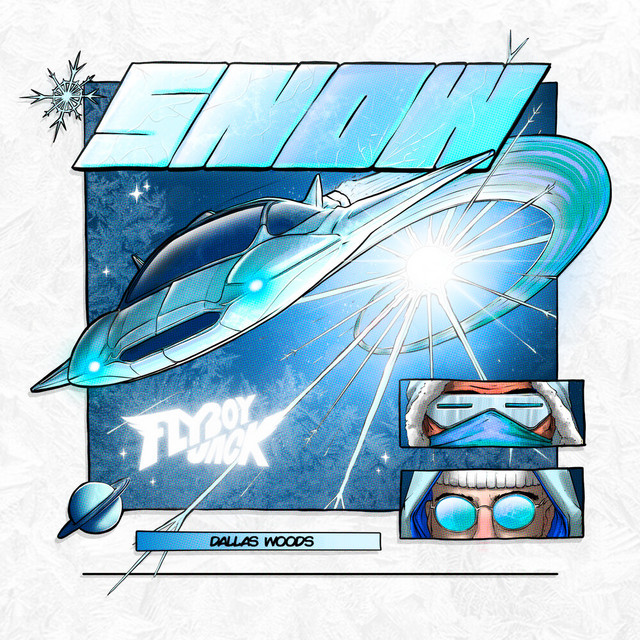

In [37]:
Image(filename='data/album_art/SNOW.jpg') 

In [38]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

In [39]:
# pulling pathnames of all album art to readin in numpy format
list_of_album_files = os.listdir("data/album_art/")

In [40]:
# # load the image
# image = Image.open('data/album_art/desire.jpg')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [41]:
image_dict = {}

for file in list_of_album_files:
    try:
        image_dict[file] = (image.imread('data/album_art/'+file))
    except:
        pass
    
# Dict with Song name (.jpg) and associated matrix 

In [42]:
image_list = []

for file in list_of_album_files:
    try:
        image_list.append(image.imread('data/album_art/'+file))
    except:
        pass

In [43]:
newlist = []
not_included = []
for k, v in image_dict.items():
    if v.shape == (640, 640, 3):
        newlist.append(v)
    else:
        not_included.append(k)

In [44]:
not_included

['WORK 4 A SMILE (DEMO).jpg']

In [45]:
df = df.loc[~(df.track_name == 'WORK 4 A SMILE (DEMO)')]

In [46]:
X = np.array(newlist)

In [47]:
df.popularity.mean()

34.375

In [48]:
y = np.array(df.popularity).reshape( len(df.popularity), 1)

In [49]:
split_val = 40
X_train = X[:split_val]
X_test  = X[split_val:]
y_train = y[:split_val]
y_test  = y[split_val:]

In [50]:
X_train = X_train / 255
X_test  = X_test  / 255

In [51]:
input_shape = X_train[0]
input_shape.shape

(640, 640, 3)

In [83]:
model = Sequential()
model.add(layers.Conv2D(64, kernel_size=1, input_shape =(640, 640, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(layers.Dense(1, activation='linear'))

In [84]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [85]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 1561.6711 - mse: 1561.6711 - val_loss: 280.9733 - val_mse: 280.9733
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 498.9146 - mse: 498.9146 - val_loss: 431.2590 - val_mse: 431.2590
Epoch 3/10
2/2 [==============================] - 4s 2s/step - loss: 532.6454 - mse: 532.6454 - val_loss: 598.7227 - val_mse: 598.7227
Epoch 4/10
2/2 [==============================] - 4s 2s/step - loss: 401.2347 - mse: 401.2347 - val_loss: 249.1982 - val_mse: 249.1982
Epoch 5/10
2/2 [==============================] - 6s 3s/step - loss: 316.6885 - mse: 316.6885 - val_loss: 177.5280 - val_mse: 177.5280
Epoch 6/10
2/2 [==============================] - 5s 2s/step - loss: 230.7476 - mse: 230.7476 - val_loss: 135.7290 - val_mse: 135.7290
Epoch 7/10
2/2 [==============================] - 4s 2s/step - loss: 156.7158 - mse: 156.7158 - val_loss: 109.7341 - val_mse: 109.7341
Epoch 8/10
2/2 [==============================] - 5s 

1/1 - 0s - loss: 60.5004 - mse: 60.5004


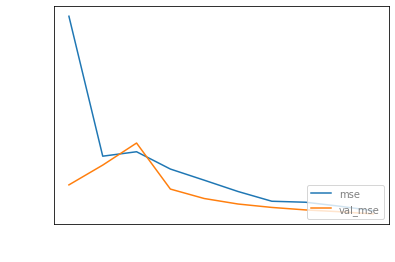

In [86]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label = 'val_mse')
plt.xlabel('Epoch')
plt.ylabel('mse')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [87]:
y_hat = model.predict(X_test);

In [88]:
error = y_test - y_hat;

In [89]:
thr = 10;
numCorrect = sum(abs(error) < thr);
numValidationImages = len(y_test);

accuracy = numCorrect/numValidationImages

In [93]:
accuracy

array([0.625])

In [90]:
# model.evaluate(X_test,y_test)

In [91]:
squares = error**2;
rmse = np.sqrt(np.mean(squares))

Text(0, 0.5, 'True Value')

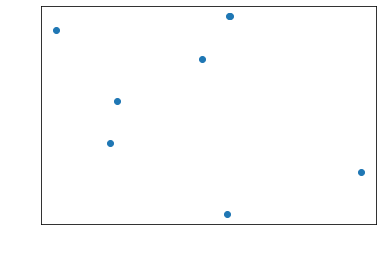

In [95]:
plt.scatter(y_hat,y_test)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

# EXAMPLE 1

In [338]:
def print_shape():
    print("X_train shape", X_train.shape)
    print("y_train shape", y_train.shape)
    print("X_test shape", X_test.shape)
    print("y_test shape", y_test.shape)

In [339]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# let's print the shape of the dataset
print_shape()

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [340]:

# keras imports for the dataset and building our neural network
from keras.datasets import mnist

from keras.utils import np_utils


In [341]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [342]:
print_shape()

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


In [324]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [325]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.8498 - accuracy: 0.5744 - val_loss: 1.2458 - val_accuracy: 0.7590
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.9524 - accuracy: 0.7941 - val_loss: 0.7307 - val_accuracy: 0.8380
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6373 - accuracy: 0.8492 - val_loss: 0.5420 - val_accuracy: 0.8690
Ep

## EXAMPLE 2

In [361]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [362]:
train_images.shape

(50000, 32, 32, 3)

In [363]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [364]:
train_images.shape

(50000, 32, 32, 3)

In [457]:
test_images.shape

(10000, 32, 32, 3)

In [463]:
train_labels.shape

(50000, 1)

In [464]:
test_labels.shape

(10000, 1)

In [470]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [497]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: in user code:

    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:385 call
        return self._run_internal_graph(
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_25 is incompatible with the layer: expected axis -1 of input shape to have value 1557504 but received input with shape [None, 1024]


313/313 - 1s - loss: 0.9237 - accuracy: 0.6777


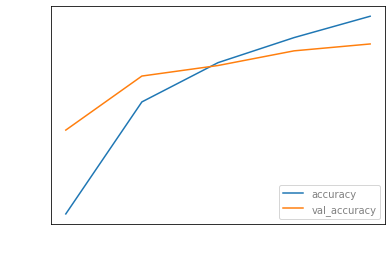

In [384]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [385]:
print(test_acc)

0.6776999831199646


In [520]:
df.popularity.describe()

count    48.000000
mean     34.375000
std       7.318368
min      22.000000
25%      28.750000
50%      34.000000
75%      39.000000
max      59.000000
Name: popularity, dtype: float64